In [129]:
%matplotlib inline

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
PRED_RES_FILE = "predict_results.json"

In [132]:
df_all = pd.read_json(PRED_RES_FILE)

In [133]:
df_all

,avg_rmse,data_file,hidden_size,model_name,model_timestamp,pred_score,process_dim,std_rmse,test_size,train_size,var_mse
0,5.043109,../data/simulated/hawkes_synthetic_exp_2d_2018...,128,HawkesDecayRNN,20181209-153942,0.520,2,0.288538,1000,600,5820.508087
1,5.431379,../data/simulated/hawkes_synthetic_exp_2d_2018...,128,HawkesLSTM,20181209-154233,0.523,2,0.403425,1000,600,8764.606890
2,5.709366,../data/simulated/hawkes_synthetic_exp_2d_2018...,128,HawkesLSTM,20181209-173255,0.545,2,0.489334,1000,1200,11175.149280


In [134]:
df_ = df_all[df_all.process_dim == 2]

In [135]:
labels = [v + "\n($D={}$)\ntrain {}".format(p, tr)
          for v,p,tr in zip(df_.model_name.values, df_.hidden_size.values, df_.train_size.values)]

In [136]:
labels

['HawkesDecayRNN\n($D=128$)\ntrain 600',
 'HawkesLSTM\n($D=128$)\ntrain 600',
 'HawkesLSTM\n($D=128$)\ntrain 1200']

In [137]:
means = df_.avg_rmse.values

In [138]:
stds = df_.std_rmse.values

In [139]:
yerr = stds

In [140]:
scores = df_.pred_score.values

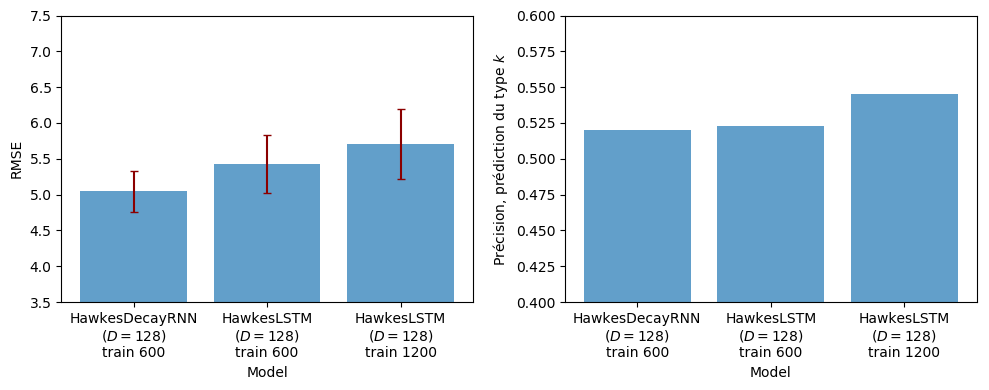

In [148]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,4), dpi=100)
ax0.bar(range(len(means)), means, alpha=0.7,
        yerr=yerr,
        error_kw=dict(
            capsize=3,
            ecolor="darkred",))
ax0.set_xlabel("Model")
ax0.set_xticks(range(len(means)))
ax0.set_xticklabels(labels)
ax0.set_ylabel("RMSE")
ax0.set_ylim((3.5, 7.5))

ax1.bar(range(len(means)), scores, alpha=0.7)
ax1.set_xlabel("Model")
ax1.set_xticks(range(len(means)))
ax1.set_xticklabels(labels)
ax1.set_ylabel("Précision, prédiction du type $k$")
ax1.set_ylim((0.4, 0.6))
fig.tight_layout()

In [142]:
import datetime
now = datetime.datetime.now()

In [143]:
now_timestamp = now.strftime("%Y%m%d-%H%M%S")
print(now_timestamp)

20181209-181315


In [149]:
fig.savefig('../results/2D_Hawkes_Data_RMSE_{}.pdf'
            .format(now_timestamp))